In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# Importing training data

In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train), (x_test, y_test)= mnist.load_data()

x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

# Building the model

In [32]:
from tensorflow.keras.layers import Dense
model=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        Dense(units=100, activation='relu'),
        Dense(units=100, activation='relu'),
        Dense(units=10, activation='linear'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics='accuracy')


# Training the model

In [33]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2790 - accuracy: 0.9191
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1182 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0805 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0618 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0499 - accuracy: 0.9842


# Evaluating the model

In [34]:
loss, accuracy=model.evaluate(x_test,y_test)
print(loss)
print(accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.1017 - accuracy: 0.9707
0.10170961171388626
0.9707000255584717


# Testing using examples created

1/1 [==============================] - 0s 81ms/step
This digit is probably a 1


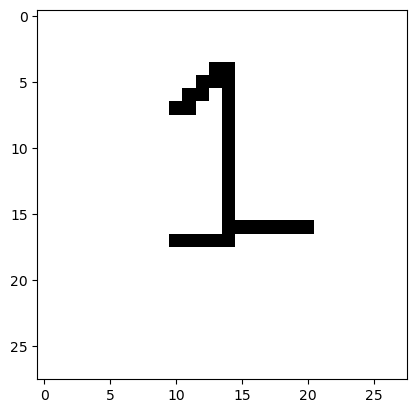

1/1 [==============================] - 0s 39ms/step
This digit is probably a 2


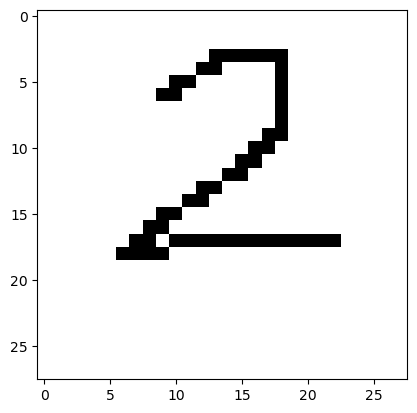

1/1 [==============================] - 0s 40ms/step
This digit is probably a 3


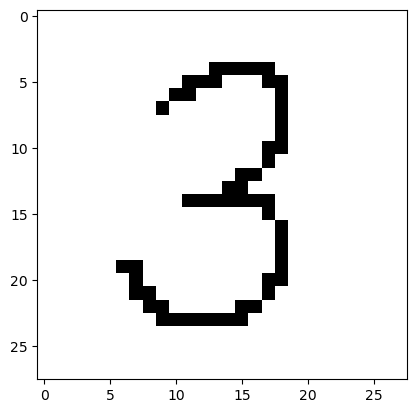

1/1 [==============================] - 0s 32ms/step
This digit is probably a 4


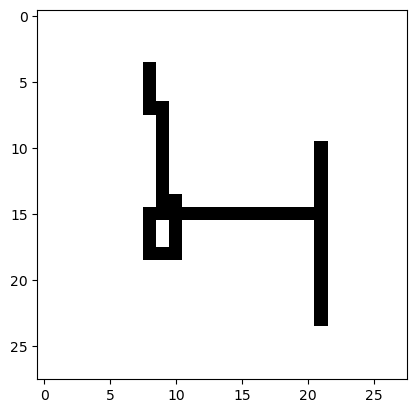

1/1 [==============================] - 0s 32ms/step
This digit is probably a 5


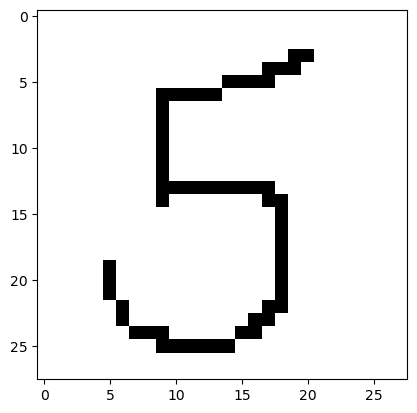

1/1 [==============================] - 0s 40ms/step
This digit is probably a 6


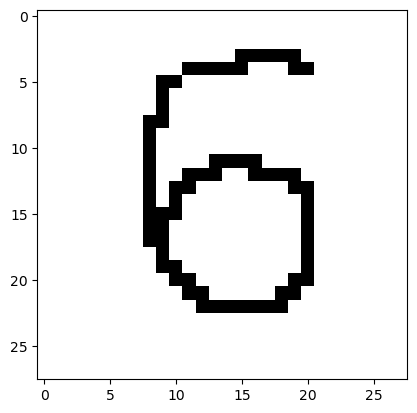

1/1 [==============================] - 0s 33ms/step
This digit is probably a 2


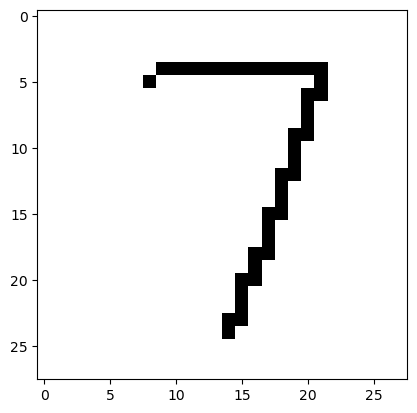

1/1 [==============================] - 0s 24ms/step
This digit is probably a 8


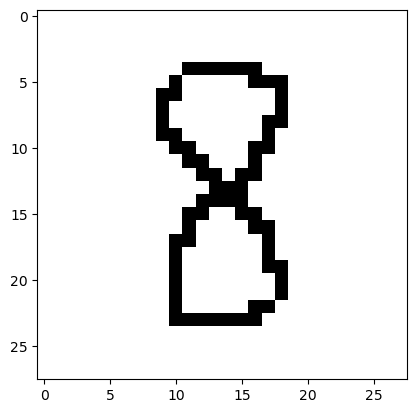

1/1 [==============================] - 0s 32ms/step
This digit is probably a 3


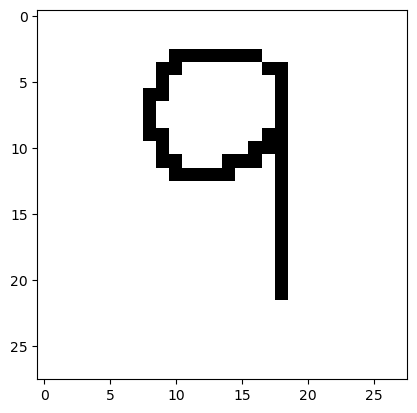

1/1 [==============================] - 0s 34ms/step
This digit is probably a 0


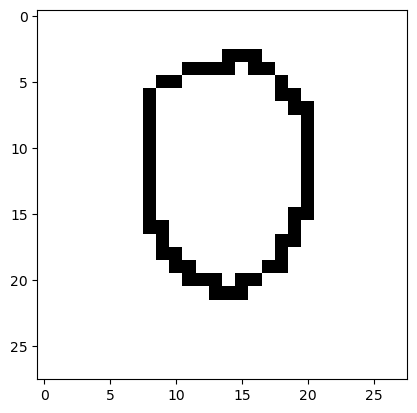

1/1 [==============================] - 0s 32ms/step
This digit is probably a 9


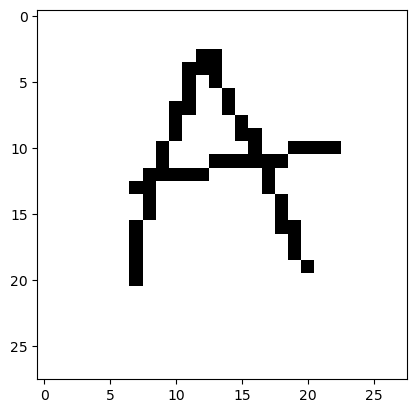

In [35]:
image_number=1
while os.path.isfile(f"D:\Programs\Python\ML_notebooks\Digit_classifier\digits\digit_{image_number}.png"):
    try:
        img=cv2.imread(f"D:\Programs\Python\ML_notebooks\Digit_classifier\digits\digit_{image_number}.png")[:,:,0]
        img=np.invert(np.array([img]))
        prediction=model.predict(img)
        prediction_p=tf.nn.softmax(prediction)
        print(f"This digit is probably a {np.argmax(prediction_p)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        image_number+=1